In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df=pd.read_csv('C:/Users/Naman/Downloads/naman python/ana lytics/loan prediction/Hr analytics/train_LZdllcl.csv')
df.head()      

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [3]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [5]:
df.skew()
#no_of_trainings -IS HIGHLY RIGHT SKEWED
#awards_won?     -IS HIGHLY RIGHT SKEWED

employee_id            -0.003128
no_of_trainings         3.445434
age                     1.007432
previous_year_rating   -0.310638
length_of_service       1.738061
KPIs_met >80%           0.619909
awards_won?             6.338914
avg_training_score      0.451908
is_promoted             2.972339
dtype: float64

In [6]:
df.std()

employee_id             22586.581449
no_of_trainings             0.609264
age                         7.660169
previous_year_rating        1.259993
length_of_service           4.265094
KPIs_met >80%               0.477590
awards_won?                 0.150450
avg_training_score         13.371559
is_promoted                 0.279137
dtype: float64

# PERCENTAGE OF NULL VALUES PRESENT

In [7]:
df.isnull().sum()/len(df)*100

employee_id             0.000000
department              0.000000
region                  0.000000
education               4.395344
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.524449
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

<AxesSubplot:xlabel='education'>

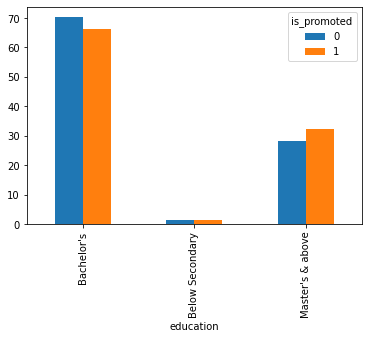

In [8]:
(pd.crosstab(df['education'],df['is_promoted'],normalize='columns')*100).plot(kind='bar')

# Imputation 

In [9]:
df['education']=df['education'].fillna(df['education'].mode()[0])

#Highest Eductation Category is Education.

In [10]:
df.previous_year_rating.value_counts(dropna=False)

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
NaN     4124
Name: previous_year_rating, dtype: int64

In [11]:
df['previous_year_rating']=df['previous_year_rating'].fillna(0)
#imputing the the Previous Year Rating by 0 ,i.e minimum value 

In [12]:
df.isnull().sum()/len(df)*100

employee_id             0.0
department              0.0
region                  0.0
education               0.0
gender                  0.0
recruitment_channel     0.0
no_of_trainings         0.0
age                     0.0
previous_year_rating    0.0
length_of_service       0.0
KPIs_met >80%           0.0
awards_won?             0.0
avg_training_score      0.0
is_promoted             0.0
dtype: float64

# Outlier Visualisation

(array([1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(1, 0, 'no_of_trainings'),
  Text(2, 0, 'age'),
  Text(3, 0, 'previous_year_rating'),
  Text(4, 0, 'length_of_service'),
  Text(5, 0, 'KPIs_met >80%'),
  Text(6, 0, 'awards_won?'),
  Text(7, 0, 'avg_training_score'),
  Text(8, 0, 'is_promoted')])

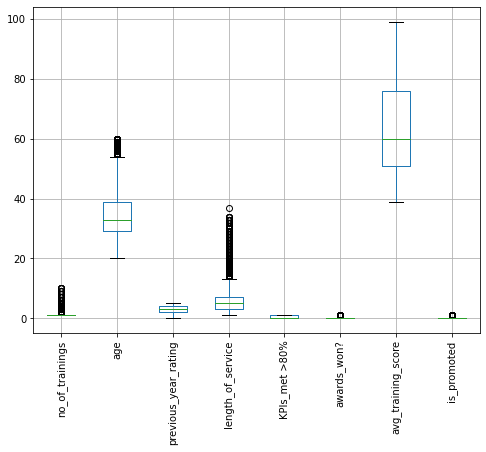

In [13]:
df.set_index(['employee_id'],inplace=True)
plt.figure(figsize = [8,6])
df.boxplot()

plt.xticks(rotation=90)

In [14]:
#Object Type conversion
df['KPIs_met >80%']=df['KPIs_met >80%'].astype('object')
df['region']=df['region'].astype('object')
df['education']=df['education'].astype('object')
df['recruitment_channel']=df['recruitment_channel'].astype('object')
df['no_of_trainings']=df['no_of_trainings'].astype('object')
df['age']=df['age'].astype('object')
df['awards_won?']=df['awards_won?'].astype('object')
df['length_of_service']=df['length_of_service'].astype('object')
df['no_of_trainings']=df['no_of_trainings'].astype('object')
df['previous_year_rating']=df['previous_year_rating'].astype('object')
df['avg_training_score']=df['avg_training_score'].astype('object')

In [15]:
cat=df.select_dtypes(exclude=np.number).columns

# Bivariate Analysis with Target Variable

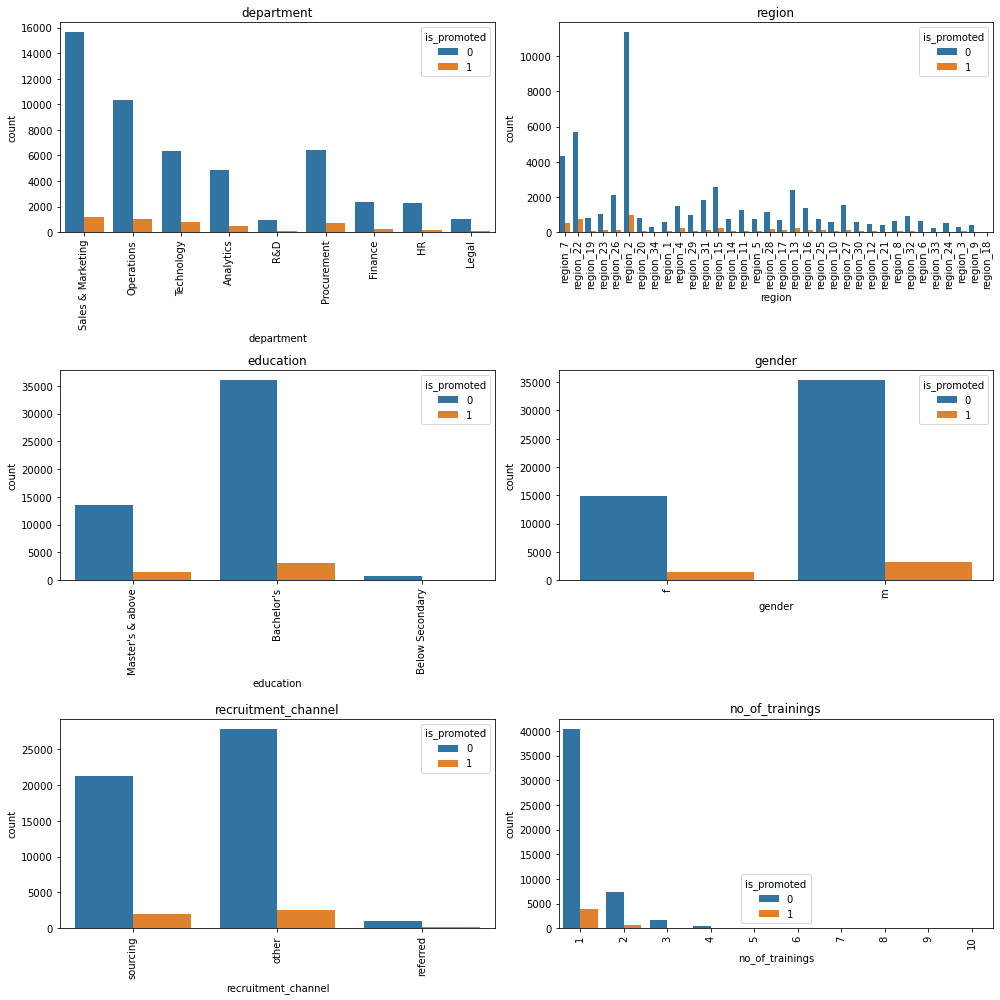

In [16]:
cols=cat[:6]
a = 3
b = 2
counter = 1
plt.figure(figsize = [14, 14])
for i in cols:
    plt.subplot(a,b,counter)
    plt.title(i)
    sns.countplot(x=df[i],hue=df['is_promoted'])
    counter = counter+1
    plt.xticks(rotation=90)    
plt.tight_layout()
plt.show()  

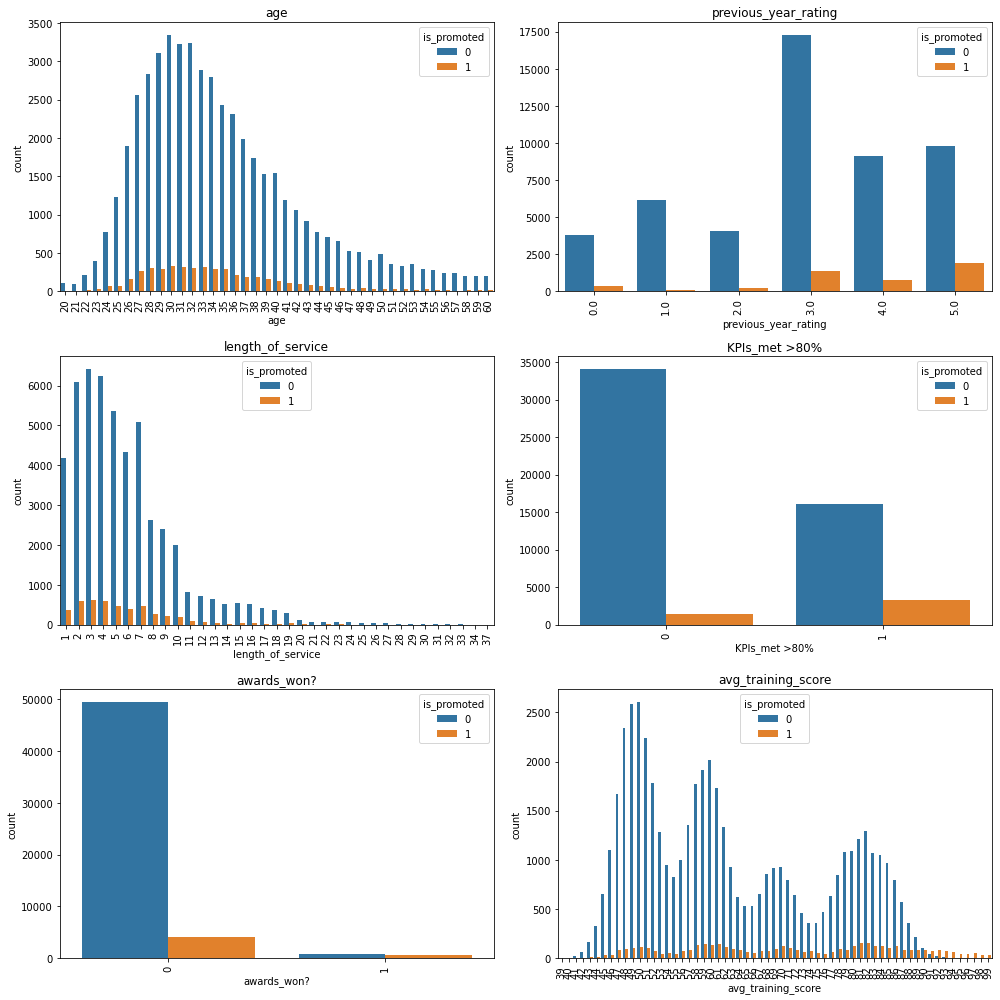

In [17]:
cols=cat[6:12]
a = 3
b = 2
counter = 1
plt.figure(figsize = [14, 14])
for i in cols:
    plt.subplot(a,b,counter)
    plt.title(i)
    sns.countplot(x=df[i],hue=df['is_promoted'])
    counter = counter+1
    plt.xticks(rotation=90)    
plt.tight_layout()
plt.show()  

<AxesSubplot:xlabel='department'>

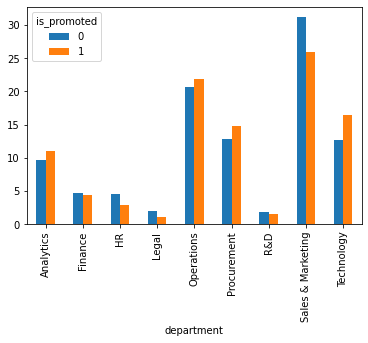

In [18]:
(pd.crosstab(df['department'],df['is_promoted'],normalize='columns')*100).plot(kind='bar')

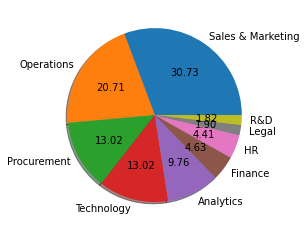

In [19]:
x=df['department'].value_counts()
plt.pie(x,labels=x.index,autopct='%0.2f',shadow=True)
plt.show()
#highest People are from Sales and Marketing

<AxesSubplot:xlabel='region'>

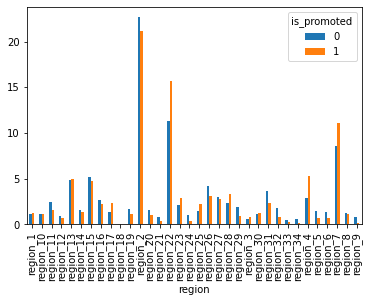

In [20]:
(pd.crosstab(df['region'],df['is_promoted'],normalize='columns')*100).plot(kind='bar')

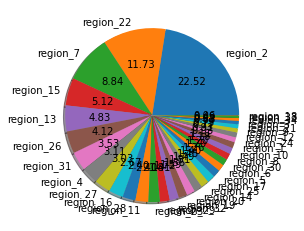

In [21]:
x=df['region'].value_counts()
plt.pie(x,labels=x.index,autopct='%0.2f',shadow=True)
plt.show()

<AxesSubplot:xlabel='no_of_trainings'>

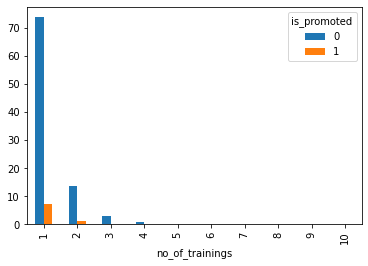

In [22]:
(pd.crosstab(df['no_of_trainings'],df['is_promoted'],normalize=True)*100).plot(kind='bar')
#people with 1 training got promoted the most .

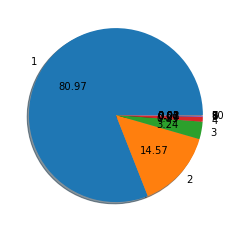

In [23]:
x=df['no_of_trainings'].value_counts()
plt.pie(x,labels=x.index,autopct='%0.2f',shadow=True)
plt.show()

In [24]:
df['Train_score']=df['no_of_trainings'] * df['avg_training_score']

In [25]:
#finding the min ,medium score and max score  
df['Train_score'].min(),df['Train_score'].mean(),df['Train_score'].max()

(39, 79.77063567362428, 710)

In [26]:
df['Train_score_l']=pd.cut(df['Train_score'],bins=[0,60,150,800],labels=['l','m','h'])

In [27]:
df['Train_score'].value_counts()

50     2204
49     2203
48     1995
51     1942
59     1798
       ... 
322       1
305       1
194       1
123       1
710       1
Name: Train_score, Length: 246, dtype: int64

<AxesSubplot:xlabel='Train_score_l'>

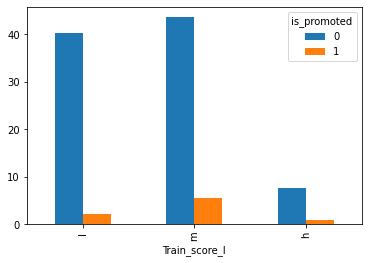

In [28]:
(pd.crosstab(df['Train_score_l'],df['is_promoted'],normalize=True)*100).plot(kind='bar')
#people with more Medium Score got promoted more 

In [29]:
df['age'].min(),df['age'].mean(),df['age'].max()

(20, 34.80391548679025, 60)

In [30]:
df['age_l']=pd.cut(df['age'],bins=[20,30,40,62],labels=['Beginner','middle','older'])

<AxesSubplot:xlabel='age_l'>

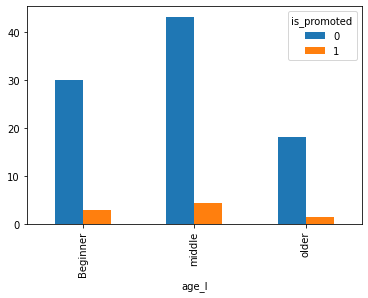

In [31]:
(pd.crosstab(df['age_l'],df['is_promoted'],normalize=True)*100).plot(kind='bar')
#Beginner and Middle age  got promoted more 

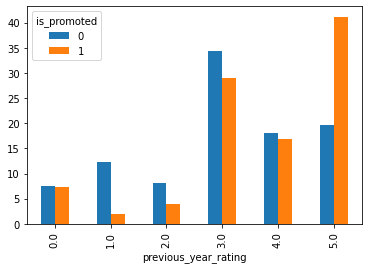

In [32]:
(pd.crosstab(df['previous_year_rating'],df['is_promoted'],normalize='columns')*100).plot(kind='bar')

def check_rat(x):
    if x==0:
        return 'bad'
    elif x==1:
        return 'lower'
    elif x==2 :
        return 'low'
    elif x==3 :
        return 'medium'
    elif x==4 :
        return 'good'
    elif x==5 :
        return 'great'

<AxesSubplot:xlabel='previous_year_rating_l'>

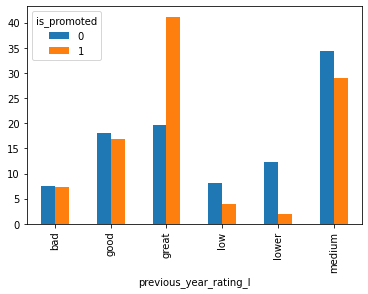

In [33]:
df['previous_year_rating_l']=df['previous_year_rating'].apply(check_rat)
(pd.crosstab(df['previous_year_rating_l'],df['is_promoted'],normalize='columns')*100).plot(kind='bar')
#people with high rating have promoted the most 

In [34]:
def depar(x):
    if (x=='Sales & Marketing')  or (x=='Operations') or (x=='Technology') :
        return 'yes'
    else :
        return 'no'
    
df['department_new']=df['department'].apply(depar)    

In [35]:
def region_check(x):
    if (x=='region_2')  or (x=='region_22') or (x=='region_7') :
        return 'yes'
    else :
        return 'no'
df['region_new']=df['region'].apply(region_check)    

In [36]:
def edu(x):
    if (x=="Bachelor's")   :
        return 'yes'
    else :
        return 'no'
df['education_new']=df['education'].apply(edu)
 

In [37]:
def age_(x):
    if (x >26) & (x<36)   :
        return 'yes'
    else :
        return 'no'
df['age_new']=df['age'].apply(age_)    

In [38]:
def rat(x):
    if (x <3)   :
        return 'yes'
    else :
        return 'no'
df['previous_year_rating_new']=df['previous_year_rating'].apply(rat)    

In [39]:
def ser(x):
    if (x >1) & (x<9)   :
        return 'yes'
    else :
        return 'no'
df['length_of_service_new']=df['length_of_service'].apply(ser)  

In [40]:
def avg_train(x):
    if x >60   :
        return 'yes'
    else :
        return 'no'
df['avg_training_score_new']=df['avg_training_score'].apply(avg_train)  

In [41]:
def train_scor(x):
    if x==1 :
        return 'yes'
    else :
        return 'no'
    
df['train__score']=df['no_of_trainings'].apply(train_scor)   


In [42]:
df

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,...,age_l,previous_year_rating_l,department_new,region_new,education_new,age_new,previous_year_rating_new,length_of_service_new,avg_training_score_new,train__score
employee_id,,,,,,,,,,,,,,,,,,,,,
65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,...,middle,great,yes,yes,no,yes,no,yes,no,yes
65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,...,Beginner,great,yes,yes,yes,yes,no,yes,no,yes
7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,...,middle,medium,yes,no,yes,yes,no,yes,no,yes
2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,...,middle,lower,yes,no,yes,no,yes,no,no,no
48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,...,older,medium,yes,no,yes,no,no,yes,yes,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,...,older,medium,yes,no,yes,no,no,no,yes,yes
74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,...,middle,low,yes,no,no,no,yes,yes,no,yes
13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,...,Beginner,great,no,no,yes,yes,no,yes,yes,yes


In [43]:
df.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted',
       'Train_score', 'Train_score_l', 'age_l', 'previous_year_rating_l',
       'department_new', 'region_new', 'education_new', 'age_new',
       'previous_year_rating_new', 'length_of_service_new',
       'avg_training_score_new', 'train__score'],
      dtype='object')

In [44]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['department']=le.fit_transform(df['department'])
df['region']=le.fit_transform(df['region'])
df['recruitment_channel']=le.fit_transform(df['recruitment_channel'])
df['education']=le.fit_transform(df['education'])

In [45]:
df['gender']=pd.get_dummies(df['gender'],drop_first=True)

In [46]:
df['age_l']=pd.cut(df['age'],bins=[20,30,40,62],labels=['20','30','40'])


In [47]:
df.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted',
       'Train_score', 'Train_score_l', 'age_l', 'previous_year_rating_l',
       'department_new', 'region_new', 'education_new', 'age_new',
       'previous_year_rating_new', 'length_of_service_new',
       'avg_training_score_new', 'train__score'],
      dtype='object')

In [48]:
df.drop(['Train_score_l', 'age', 'previous_year_rating_l'],axis=1,inplace=True)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54808 entries, 65438 to 51526
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   department                54808 non-null  int32   
 1   region                    54808 non-null  int32   
 2   education                 54808 non-null  int32   
 3   gender                    54808 non-null  uint8   
 4   recruitment_channel       54808 non-null  int32   
 5   no_of_trainings           54808 non-null  object  
 6   previous_year_rating      54808 non-null  object  
 7   length_of_service         54808 non-null  object  
 8   KPIs_met >80%             54808 non-null  object  
 9   awards_won?               54808 non-null  object  
 10  avg_training_score        54808 non-null  object  
 11  is_promoted               54808 non-null  int64   
 12  Train_score               54808 non-null  object  
 13  age_l                     54695 non-null  

In [50]:
df['Train_score']=pd.to_numeric(df['Train_score'])
df['star_emp']=df[['KPIs_met >80%','awards_won?']].any(axis=1,skipna=False)
df.star_emp = df.star_emp.apply(lambda x: 1 if x==True else 0)

In [51]:
df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,...,age_l,department_new,region_new,education_new,age_new,previous_year_rating_new,length_of_service_new,avg_training_score_new,train__score,star_emp
employee_id,,,,,,,,,,,,,,,,,,,,,
65438,7,31,2,0,2,1,5.0,8,1,0,...,30,yes,yes,no,yes,no,yes,no,yes,1
65141,4,14,0,1,0,1,5.0,4,0,0,...,20,yes,yes,yes,yes,no,yes,no,yes,0
7513,7,10,0,1,2,1,3.0,7,0,0,...,30,yes,no,yes,yes,no,yes,no,yes,0
2542,7,15,0,1,0,2,1.0,10,0,0,...,30,yes,no,yes,no,yes,no,no,no,0
48945,8,18,0,1,0,1,3.0,2,0,0,...,40,yes,no,yes,no,no,yes,yes,yes,0


In [52]:
df.shape

(54808, 23)

In [53]:
df.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted',
       'Train_score', 'age_l', 'department_new', 'region_new', 'education_new',
       'age_new', 'previous_year_rating_new', 'length_of_service_new',
       'avg_training_score_new', 'train__score', 'star_emp'],
      dtype='object')

In [54]:
df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,...,age_l,department_new,region_new,education_new,age_new,previous_year_rating_new,length_of_service_new,avg_training_score_new,train__score,star_emp
employee_id,,,,,,,,,,,,,,,,,,,,,
65438,7,31,2,0,2,1,5.0,8,1,0,...,30,yes,yes,no,yes,no,yes,no,yes,1
65141,4,14,0,1,0,1,5.0,4,0,0,...,20,yes,yes,yes,yes,no,yes,no,yes,0
7513,7,10,0,1,2,1,3.0,7,0,0,...,30,yes,no,yes,yes,no,yes,no,yes,0
2542,7,15,0,1,0,2,1.0,10,0,0,...,30,yes,no,yes,no,yes,no,no,no,0
48945,8,18,0,1,0,1,3.0,2,0,0,...,40,yes,no,yes,no,no,yes,yes,yes,0


In [55]:
df.shape

(54808, 23)

In [56]:
df['no_of_trainings']=pd.to_numeric(df['no_of_trainings'])
#df['age']=pd.to_numeric(df['age'])
df['previous_year_rating']=pd.to_numeric(df['previous_year_rating'])
df['length_of_service']=pd.to_numeric(df['length_of_service'])

df['avg_training_score']=pd.to_numeric(df['avg_training_score'])

In [57]:
df.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted',
       'Train_score', 'age_l', 'department_new', 'region_new', 'education_new',
       'age_new', 'previous_year_rating_new', 'length_of_service_new',
       'avg_training_score_new', 'train__score', 'star_emp'],
      dtype='object')

In [58]:
df['best_emp']=df[['department_new', 'region_new', 'education_new',
       'age_new', 'previous_year_rating_new', 'length_of_service_new',
       'avg_training_score_new', 'train__score', 'star_emp']].any(axis=1,skipna=False)

df.best_emp = df.best_emp.apply(lambda x: 1 if x==True else 0)


In [59]:
df.drop(['department', 'region', 'education', 'gender', 'recruitment_channel','KPIs_met >80%','awards_won?'
        ],axis=1,inplace=True)
df=pd.get_dummies(df,drop_first=True)

<AxesSubplot:>

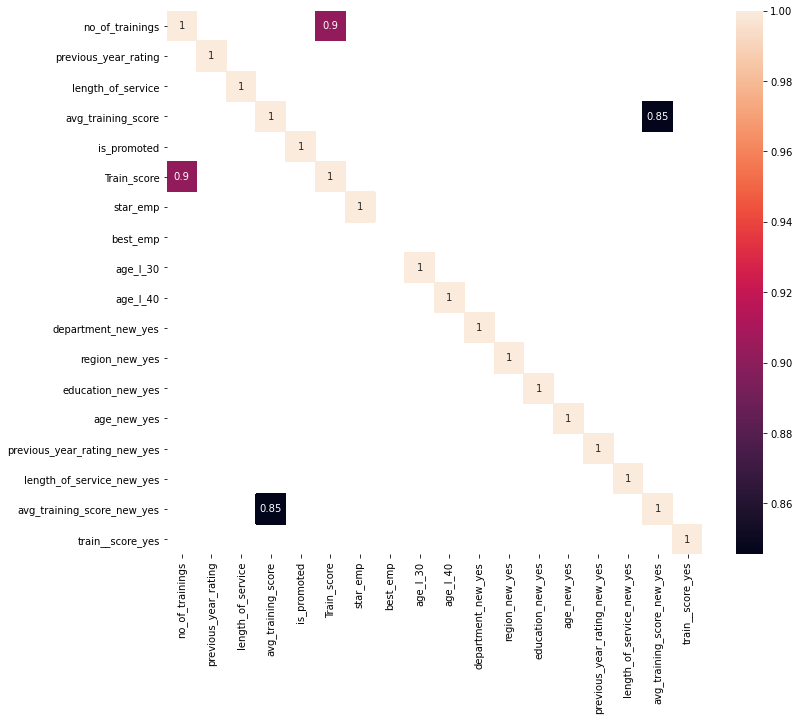

In [60]:
plt.figure(figsize = [12, 10])
sns.heatmap(df.corr()[df.corr()>0.7],annot=True)

# Model Training 

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score 
from imblearn.over_sampling import SMOTE

X=df.drop('is_promoted',axis=1)
y=df['is_promoted']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= 0.10,random_state=20)

from sklearn.preprocessing import StandardScaler
mn=StandardScaler()

Xtrain=pd.DataFrame(mn.fit_transform(Xtrain),columns=Xtrain.columns,index=Xtrain.index)
Xtest=pd.DataFrame(mn.fit_transform(Xtest),columns=Xtest.columns,index=Xtest.index)

In [62]:
Xtrain.head()

,no_of_trainings,previous_year_rating,length_of_service,avg_training_score,Train_score,star_emp,best_emp,age_l_30,age_l_40,department_new_yes,region_new_yes,education_new_yes,age_new_yes,previous_year_rating_new_yes,length_of_service_new_yes,avg_training_score_new_yes,train__score_yes
employee_id,,,,,,,,,,,,,,,,,
46478,1,1.0,11,68,68,0,1,1,0,0,0,0,0,1,0,1,1
16174,2,5.0,4,70,140,1,1,0,0,0,0,1,1,0,1,1,0
60086,1,3.0,4,67,67,0,1,1,0,0,1,1,1,0,1,1,1
51941,1,1.0,9,48,48,0,1,1,0,1,1,1,0,1,0,0,1
14304,1,3.0,7,74,74,0,1,0,1,1,0,1,0,0,1,1,1


In [63]:
Xtrain.shape

(49327, 17)

In [64]:
Xtest.shape

(5481, 17)

In [65]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(random_state=20,solver='liblinear')
lr_model=lr.fit(Xtrain,ytrain)

y_pred=lr_model.predict(Xtest)

print(classification_report(ytest,y_pred))
print()
print('RFC score ',np.mean(cross_val_score(lr,Xtrain,ytrain,cv=5)))
print()
print(confusion_matrix(ytest,y_pred))
print('train score ',lr_model.score(Xtrain,ytrain))
print('test score ',lr_model.score(Xtest,ytest))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      5034
           1       0.77      0.06      0.11       447

    accuracy                           0.92      5481
   macro avg       0.85      0.53      0.54      5481
weighted avg       0.91      0.92      0.89      5481


RFC score  0.9175096911898712

[[5026    8]
 [ 420   27]]
train score  0.9175096802967948
test score  0.9219120598430943


# Using Smote -Upsampling 

In [66]:
sm = SMOTE()
X_train, y_train = sm.fit_resample(Xtrain, ytrain.astype('int'))

In [67]:
X_train.shape

(90212, 17)

In [68]:
y_train.value_counts()

0    45106
1    45106
Name: is_promoted, dtype: int64

In [69]:
ytrain.value_counts()

0    45106
1     4221
Name: is_promoted, dtype: int64

In [70]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(random_state=20,solver='liblinear')
lr_model=lr.fit(X_train,y_train)

y_pred=lr_model.predict(Xtest)

print(classification_report(ytest,y_pred))
print()
print('RFC score ',np.mean(cross_val_score(lr,X_train,y_train,cv=5)))
print()
print(confusion_matrix(ytest,y_pred))
print('train score ',lr_model.score(X_train,y_train))
print('test score ',lr_model.score(Xtest,ytest))

              precision    recall  f1-score   support

           0       0.96      0.72      0.82      5034
           1       0.18      0.69      0.28       447

    accuracy                           0.72      5481
   macro avg       0.57      0.70      0.55      5481
weighted avg       0.90      0.72      0.78      5481


RFC score  0.7332507669004853

[[3616 1418]
 [ 139  308]]
train score  0.7337826453243471
test score  0.715927750410509


# DecisionTreeClassifier

In [71]:
from sklearn.tree import DecisionTreeClassifier

dc=DecisionTreeClassifier(random_state=20)
dc_model=dc.fit(X_train,y_train)
y_pred=dc_model.predict(Xtest)

print(classification_report(ytest,y_pred))
print()

print('RFC score ',np.mean(cross_val_score(dc,X_train,y_train,cv=5)))
print()
print(confusion_matrix(ytest,y_pred))

print('train score ',dc_model.score(X_train,y_train))

print('test score ',dc_model.score(Xtest,ytest))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91      5034
           1       0.22      0.38      0.28       447

    accuracy                           0.84      5481
   macro avg       0.58      0.63      0.59      5481
weighted avg       0.88      0.84      0.86      5481


RFC score  0.9065316695966722

[[4438  596]
 [ 278  169]]
train score  0.9660023056799539
test score  0.8405400474365992


# RandomForestClassifier

In [72]:
Rfc=RandomForestClassifier(random_state=20)
Rfc_model=Rfc.fit(X_train,y_train)

y_pred=Rfc_model.predict(Xtest)

print(classification_report(ytest,y_pred))
print()

print('RFC score ',np.mean(cross_val_score(Rfc,X_train,y_train,cv=5)))
print()
print(confusion_matrix(ytest,y_pred))
print('train score ',Rfc_model.score(X_train,y_train))

print('test score ',Rfc_model.score(Xtest,ytest))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92      5034
           1       0.24      0.38      0.29       447

    accuracy                           0.85      5481
   macro avg       0.59      0.64      0.61      5481
weighted avg       0.88      0.85      0.87      5481


RFC score  0.918924711154031

[[4498  536]
 [ 277  170]]
train score  0.9659801356803973
test score  0.8516694033935414


In [73]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier(random_state=20)
abc_model=abc.fit(X_train,y_train)
y_pred=abc_model.predict(Xtest)

print(classification_report(ytest,y_pred))
print()
print('RFC score ',np.mean(cross_val_score(abc,X_train,y_train,cv=5)))
print()
print(confusion_matrix(ytest,y_pred))
print('train score ',abc_model.score(X_train,y_train))
print('test score ',abc_model.score(Xtest,ytest))

              precision    recall  f1-score   support

           0       0.96      0.79      0.87      5034
           1       0.21      0.63      0.32       447

    accuracy                           0.78      5481
   macro avg       0.59      0.71      0.59      5481
weighted avg       0.90      0.78      0.82      5481


RFC score  0.7717380642062361

[[3997 1037]
 [ 167  280]]
train score  0.7719815545603689
test score  0.7803320561941252


In [74]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(random_state=20 )
gb_model=gb.fit(X_train,y_train)
y_pred=gb_model.predict(Xtest)

print(classification_report(ytest,y_pred))
print()

print('RFC score ',np.mean(cross_val_score(gb,X_train,y_train,cv=5)))
print()
print(confusion_matrix(ytest,y_pred))

print('train score ',gb_model.score(X_train,y_train))

print('test score ',gb_model.score(Xtest,ytest))

              precision    recall  f1-score   support

           0       0.96      0.78      0.86      5034
           1       0.21      0.63      0.31       447

    accuracy                           0.77      5481
   macro avg       0.58      0.71      0.59      5481
weighted avg       0.90      0.77      0.82      5481


RFC score  0.8118436199748789

[[3946 1088]
 [ 164  283]]
train score  0.8155456036890879
test score  0.7715745301952198


In [75]:
from xgboost import XGBClassifier
xgb=XGBClassifier(random_state=20,eval_metric='logloss',use_label_encoder=False)
xgb_model=xgb.fit(X_train,y_train)
y_pred=xgb_model.predict(Xtest)

print(classification_report(ytest,y_pred))
print()

print('RFC score ',np.mean(cross_val_score(xgb,X_train,y_train,cv=5)))
print()
print(confusion_matrix(ytest,y_pred))

print('train score ',xgb_model.score(X_train,y_train))

print('test score ',xgb_model.score(Xtest,ytest))

              precision    recall  f1-score   support

           0       0.96      0.84      0.89      5034
           1       0.24      0.56      0.33       447

    accuracy                           0.82      5481
   macro avg       0.60      0.70      0.61      5481
weighted avg       0.90      0.82      0.85      5481


RFC score  0.8557624148099372

[[4222  812]
 [ 195  252]]
train score  0.8691637476167251
test score  0.816274402481299


# SGDClassifier

In [76]:
from sklearn.linear_model import SGDClassifier

sgd=SGDClassifier(random_state=20 )
sgd_model=sgd.fit(X_train,y_train)
y_pred=sgd_model.predict(Xtest)

print(classification_report(ytest,y_pred))
print()
print('RFC score ',np.mean(cross_val_score(Rfc,X_train,y_train,cv=5)))
print()
print(confusion_matrix(ytest,y_pred))
print('train score ',sgd_model.score(X_train,y_train))
print('test score ',sgd_model.score(Xtest,ytest))

              precision    recall  f1-score   support

           0       0.97      0.65      0.78      5034
           1       0.16      0.74      0.26       447

    accuracy                           0.66      5481
   macro avg       0.56      0.69      0.52      5481
weighted avg       0.90      0.66      0.73      5481


RFC score  0.918924711154031

[[3272 1762]
 [ 117  330]]
train score  0.7031880459362391
test score  0.6571793468345193


# Test

In [143]:
test=pd.read_csv('C:/Users/Naman/Downloads/naman python/ana lytics/loan prediction/Hr analytics/test_2umaH9m.csv')
test.head()      

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [144]:
test.isnull().sum()/len(test)*100

employee_id             0.000000
department              0.000000
region                  0.000000
education               4.401873
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.713921
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
dtype: float64

In [145]:
test['previous_year_rating']=test['previous_year_rating'].fillna(0)
test['education']=test['education'].ffill(axis = 0)

In [146]:
test['gender']=pd.get_dummies(test['gender'],drop_first=True)

In [147]:
test.isnull().sum()/len(test)*100

employee_id             0.0
department              0.0
region                  0.0
education               0.0
gender                  0.0
recruitment_channel     0.0
no_of_trainings         0.0
age                     0.0
previous_year_rating    0.0
length_of_service       0.0
KPIs_met >80%           0.0
awards_won?             0.0
avg_training_score      0.0
dtype: float64

In [148]:
test.set_index(['employee_id'],inplace=True)
test['KPIs_met >80%']=test['KPIs_met >80%'].astype('object')
test['region']=test['region'].astype('object')
test['education']=test['education'].astype('object')
test['recruitment_channel']=test['recruitment_channel'].astype('object')

In [149]:
test['Train_score']=test['no_of_trainings'] * test['avg_training_score']

test['Train_score']=pd.to_numeric(test['Train_score'])
test['star_emp']=test[['KPIs_met >80%','awards_won?']].any(axis=1,skipna=False)
test.star_emp = test.star_emp.apply(lambda x: 1 if x==True else 0)

In [150]:
test['department']=le.fit_transform(test['department'])
test['region']=le.fit_transform(test['region'])
test['recruitment_channel']=le.fit_transform(test['recruitment_channel'])
test['education']=le.fit_transform(test['education'])

In [151]:
def depar(x):
    if (x=='Sales & Marketing')  or (x=='Operations') or (x=='Technology') :
        return 'yes'
    else :
        return 'no'
    
test['department_new']=test['department'].apply(depar)   

In [152]:
def region_check(x):
    if (x=='region_2')  or (x=='region_22') or (x=='region_7') :
        return 'yes'
    else :
        return 'no'
    

test['region_new']=test['region'].apply(region_check)

In [153]:
def edu(x):
    if (x=="Bachelor's")   :
        return 'yes'
    else :
        return 'no'
    
test['education_new']=test['education'].apply(edu)

In [154]:
def age_(x):
    if (x >26) & (x<36)   :
        return 'yes'
    else :
        return 'no'
test['age_new']=test['age'].apply(age_) 

In [155]:
def ser(x):
    if (x >1) & (x<9)   :
        return 'yes'
    else :
        return 'no'
test['length_of_service_new']=test['length_of_service'].apply(ser)  

In [156]:
def rat(x):
    if (x <3)   :
        return 'yes'
    else :
        return 'no'
test['previous_year_rating_new']=test['previous_year_rating'].apply(rat)    


In [157]:
def avg_train(x):
    if (x >60)   :
        return 'yes'
    else :
        return 'no'
test['avg_training_score_new']=test['avg_training_score'].apply(avg_train)  

In [158]:
def region_check(x):
    if (x=='region_2')  or (x=='region_22') or (x=='region_7') :
        return 'yes'
    else :
        return 'no'
test['region_new']=test['region'].apply(region_check)    

In [159]:
def edu(x):
    if (x=="Bachelor's")   :
        return 'yes'
    
    else :
        return 'no'
test['education_new']=test['education'].apply(edu)
 

In [160]:
def depar(x):
    if (x=='Sales & Marketing')  or (x=='Operations') or (x=='Technology') :
        return 'yes'
    else :
        return 'no'
    
test['department_new']=test['department'].apply(depar)    

def region_check(x):
    if (x=='region_2')  or (x=='region_22') or (x=='region_7') :
        return 'yes'
    else :
        return 'no'
test['region_new']=test['region'].apply(region_check)    

def edu(x):
    if (x=="Bachelor's")   :
        return 'yes'
    else :
        return 'no'
test['education_new']=test['education'].apply(edu)
 

def age_(x):
    if (x >26) & (x<36)   :
        return 'yes'
    else :
        return 'no'
test['age_new']=test['age'].apply(age_)    

def rat(x):
    if (x <3)   :
        return 'yes'
    else :
        return 'no'
test['previous_year_rating_new']=test['previous_year_rating'].apply(rat)    

def ser(x):
    if (x >1) & (x<9)   :
        return 'yes'
    else :
        return 'no'
test['length_of_service_new']=test['length_of_service'].apply(ser)  

def avg_train(x):
    if x >60   :
        return 'yes'
    else :
        return 'no'
test['avg_training_score_new']=test['avg_training_score'].apply(avg_train)  

def train_scor(x):
    if x==1 :
        return 'yes'
    else :
        return 'no'
    
test['train__score']=test['no_of_trainings'].apply(train_scor)   


In [161]:
test.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'Train_score',
       'star_emp', 'department_new', 'region_new', 'education_new', 'age_new',
       'length_of_service_new', 'previous_year_rating_new',
       'avg_training_score_new', 'train__score'],
      dtype='object')

In [162]:
test['age_l']=pd.cut(test['age'],bins=[20,30,40,62],labels=['20','30','40'])

In [163]:
test['best_emp']=test[['department_new', 'region_new', 'education_new',
       'age_new', 'previous_year_rating_new', 'length_of_service_new',
       'avg_training_score_new', 'Train_score', 'star_emp']].any(axis=1,skipna=False)

test.best_emp = test.best_emp.apply(lambda x: 1 if x==True else 0)

In [164]:
test.drop([ 'age','KPIs_met >80%'],axis=1,inplace=True)
test=pd.get_dummies(test,drop_first=True)

In [166]:
test.shape

(23490, 21)

In [167]:
test.drop(['department', 'region', 'education', 'gender', 'recruitment_channel','awards_won?'
        ],axis=1,inplace=True)

In [168]:
test.shape

(23490, 15)

In [138]:
test.head()

,no_of_trainings,previous_year_rating,length_of_service,avg_training_score,Train_score,star_emp,best_emp,age_new_yes,length_of_service_new_yes,previous_year_rating_new_yes,avg_training_score_new_yes,train__score_yes,age_l_30,age_l_40
employee_id,,,,,,,,,,,,,,
8724,1,0.0,1,77,77,1,1,0,0,1,1,1,0,0
74430,1,3.0,5,51,51,0,1,1,1,0,0,1,1,0
72255,1,1.0,4,47,47,0,1,1,1,1,0,1,1,0
38562,3,2.0,9,65,195,0,1,1,0,1,1,0,1,0
64486,1,4.0,7,61,61,0,1,1,1,0,1,1,0,0


In [169]:
test['no_of_trainings']=pd.to_numeric(test['no_of_trainings'])
test['previous_year_rating']=pd.to_numeric(test['previous_year_rating'])
test['length_of_service']=pd.to_numeric(test['length_of_service'])
test['avg_training_score']=pd.to_numeric(test['avg_training_score'])

In [170]:
from sklearn.preprocessing import MinMaxScaler
mn=MinMaxScaler()
test=pd.DataFrame(mn.fit_transform(test),columns=test.columns,index=test.index)

In [171]:
test.columns

Index(['no_of_trainings', 'previous_year_rating', 'length_of_service',
       'avg_training_score', 'Train_score', 'star_emp', 'best_emp',
       'KPIs_met >80%_1', 'age_new_yes', 'length_of_service_new_yes',
       'previous_year_rating_new_yes', 'avg_training_score_new_yes',
       'train__score_yes', 'age_l_30', 'age_l_40'],
      dtype='object')

In [172]:
X_train.columns

Index(['no_of_trainings', 'previous_year_rating', 'length_of_service',
       'avg_training_score', 'Train_score', 'star_emp', 'best_emp', 'age_l_30',
       'age_l_40', 'department_new_yes', 'region_new_yes', 'education_new_yes',
       'age_new_yes', 'previous_year_rating_new_yes',
       'length_of_service_new_yes', 'avg_training_score_new_yes',
       'train__score_yes'],
      dtype='object')

# Using Lr _model

In [ ]:
y_pred_final=lr_model.predict(test)

lr_model_pred=pd.DataFrame({'is_promoted':y_pred_final},index=test.index)

lr_model_pred.head()

In [ ]:
lr_model_pred.to_csv('lr_model_pred.csv')

# Decision Tree 

In [ ]:
y_pred_dc=dc_model.predict(test)
dc_model_pred=pd.DataFrame({'is_promoted':y_pred_dc},index=test.index)

dc_model_pred.head()

In [ ]:
dc_model_pred.to_csv('dc_model_pred.csv')

# Random Forest

In [ ]:
y_pred_rf=Rfc_model.predict(test)

rf_model_pred=pd.DataFrame({'is_promoted':y_pred_rf},index=test.index)

rf_model_pred.head()

In [ ]:
rf_model_pred.to_csv('rf_model_pred.csv')

# Xgboost

In [ ]:
y_pred_x=xgb_model.predict(test)
xg_model_pred=pd.DataFrame({'is_promoted':y_pred_x},index=test.index)

xg_model_pred.head()

In [ ]:
xg_model_pred.to_csv('xg_model_pred_3.csv')

# Gb model

In [ ]:
y_pred_gb=gb_model.predict(test)

gb_model_pred=pd.DataFrame({'is_promoted':y_pred_gb},index=test.index)

gb_model_pred.head()

In [ ]:
gb_model_pred.to_csv('gb_model_pred_2.csv')

# Adaboost _model

In [ ]:
y_pred_abc=abc_model.predict(test)
abc_model_pred=pd.DataFrame({'is_promoted':y_pred_abc},index=test.index)

abc_model_pred.head()
abc_model_pred.to_csv('abc_model_pred_2.csv')

# SGD Classifier 

In [ ]:
y_pred_sgd=sgd_model.predict(test)
sgd_model_pred=pd.DataFrame({'is_promoted':y_pred_sgd},index=test.index)

sgd_model_pred.head()
sgd_model_pred.to_csv('abc_model_pred_2.csv')